Jupyter notebook to generate plots given the results of the train + test runs.

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fpath = "./results/info_models.pkl"
with open(fpath, "rb") as f:
    info_models = pickle.load(f)

In [3]:
def format(dic):
    df = pd.DataFrame.from_dict(dic, orient="columns").stack().to_frame()
    df = pd.DataFrame(df[0].values.tolist(), index=df.index)
    df = df.reset_index().rename({"level_0": "run"}, axis=1)
    df = df.add_prefix("e_").rename({"e_run": "run", "e_level_1": "level_1"}, axis=1).reset_index()
    df = pd.wide_to_long(df, "e_" , i=["index", "run"], j="epoch")
    df = df.rename({"level_1": "type", "e_": "value"}, axis=1).reset_index()
    return df.pivot_table(index=["run", "epoch"], columns="type", values="value", dropna=False)

In [4]:
df_base = format(info_models["baseline"])
df_siam2 = format(info_models["siamese2"])
df_siam10 = format(info_models["siamese10"])

In [5]:
# Just an example
df_base.sample(30)

,type,test_acc,test_acc_loss,train_acc,train_acc_loss
run,epoch,,,,
9,20,0.844,6.638587,1.000,0.007010
6,8,0.832,5.811616,1.000,0.100472
1,13,0.837,6.148902,1.000,0.015742
6,24,0.825,7.988821,1.000,0.005032
0,19,0.838,6.107679,1.000,0.007875
7,12,0.822,6.137086,1.000,0.020038
2,4,0.807,5.118023,0.938,2.453142
4,19,0.842,5.803629,1.000,0.008013
2,6,0.824,5.109854,0.999,0.239303


In [6]:
# An one for the siamese networks
df_siam2.head(27)

type       test_acc10  test_acc2  test_acc_loss  train_acc10  train_acc2  \
run epoch                                                                  
0   0           0.745      0.635      47.980403        0.730       0.654   
    1           0.870      0.783      16.412420        0.895       0.799   
    2           0.917      0.812      11.209818        0.938       0.833   
    3           0.946      0.850       7.798162        0.967       0.885   
    4           0.953      0.883       7.032009        0.977       0.912   
    5           0.942      0.850       7.418105        0.960       0.880   
    6           0.949      0.830       6.832983        0.971       0.860   
    7           0.948      0.887       5.935349        0.983       0.917   
    8           0.958      0.883       5.382072        0.986       0.919   
    9           0.962      0.909       4.412361        0.995       0.950   
    10          0.938      0.827       7.201962        0.972       0.870   
    11          0.963      0.896       4.571869        0.993       0.944   
    12          0.952      0.885       4.787580        0.991       0.948   
    13          0.963      0.894       4.663586        0.994       0.951   
    14          0.971      0.910       3.594496        1.000       0.970   
    15          0.952      0.888       5.524335        0.984       0.943   
    16          0.964      0.912       3.756456        0.997       0.966   
    17          0.964      0.906       3.671598        0.999       0.966   
    18          0.962      0.908       3.754604        1.000       0.967   
    19          0.956      0.901       3.960608        0.999       0.958   
    20          0.972      0.918       3.403104        1.000       0.983   
    21          0.970      0.922       3.331367        1.000       0.984   
    22          0.967      0.922       3.271843        1.000       0.991   
    23          0.970      0.917       3.248905        1.000       0.989   
    24          0.967      0.921       3.288816        1.000       0.991   
1   0           0.771      0.606      28.480580        0.796       0.599   
    1           0.844      0.657      25.490179        0.847       0.666   

type       train_acc_loss  
run epoch                  
0   0           43.407386  
    1           22.233778  
    2           12.699330  
    3            9.045775  
    4            7.096994  
    5            6.323999  
    6            6.125192  
    7            5.678741  
    8            5.157640  
    9            4.790487  
    10           5.293513  
    11           5.043609  
    12           4.211145  
    13           4.059079  
    14           3.679453  
    15           4.319210  
    16           4.132220  
    17           3.892461  
    18           3.512563  
    19           3.644943  
    20           3.395053  
    21           3.347035  
    22           3.272769  
    23           3.242447  
    24           3.233267  
1   0           44.780968  
    1           24.402761

In [27]:
def prep_group(df, cols):
    df = df.groupby("epoch")[cols].agg(["mean", "std"]).reset_index()
    df.columns = ["_".join(col).strip() for col in df.columns.values]
    df["epoch_"] = df["epoch_"] + 1 
    return df

def plot2(data, title, mode="accuracy", title_fontsize=18, axis_fontsize=16, save=True):
    """
    Similar to plot_graph func, but merge graphs together
    """
    
    if mode == "loss":
        cols = ["train_acc_loss", "test_acc_loss"]
        g = prep_group(data, cols)
    else:
        cols = ["train_acc", "test_acc"]
        g = prep_group(data, cols)
    
    fig = plt.figure()

    plt.plot(g["epoch_"], g[cols[0] + "_mean"], label="train " + mode)
    plt.fill_between(g["epoch_"], g[cols[0] + "_mean"] - g[cols[0] + "_std"], g[cols[0] + "_mean"] + g[cols[0] + "_std"], alpha=0.2)
    
    plt.plot(g["epoch_"], g[cols[1] + "_mean"], label="test " + mode)
    plt.fill_between(g["epoch_"], g[cols[1] + "_mean"] - g[cols[1] + "_std"], g[cols[1] + "_mean"] + g[cols[1] + "_std"], alpha=0.2)
    
    plt.title(title, fontsize=title_fontsize)
    plt.ylabel(mode, fontsize=axis_fontsize)
    plt.xlabel("epoch", fontsize=axis_fontsize)
    plt.legend(loc="lower right", fontsize=title_fontsize)
    plt.style.use("seaborn")
    
    if save:
        fname = f"./plots/{mode}_{title}.png"
        plt.savefig(fname, dpi="figure")

In [28]:
# Reformat siamese df
#df_siam2 = df_siam2.drop(["train_acc10", "test_acc10"], axis=1).rename({"train_acc2": "train_acc", "test_acc2": "test_acc"}, axis=1)
#df_siam10 = df_siam10.drop(["train_acc2", "test_acc2"], axis=1).rename({"train_acc10": "train_acc", "test_acc10": "test_acc"}, axis=1)

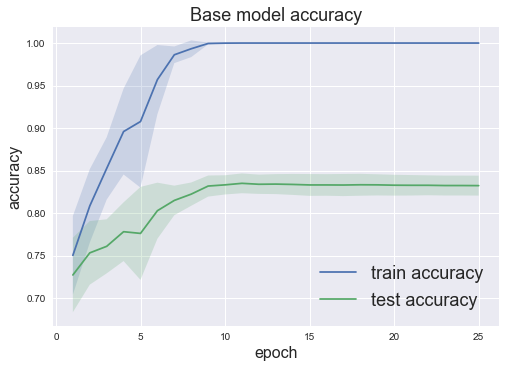

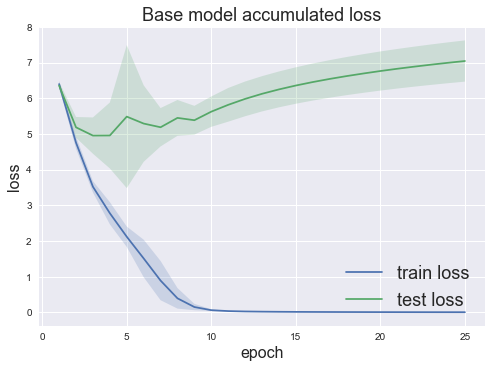

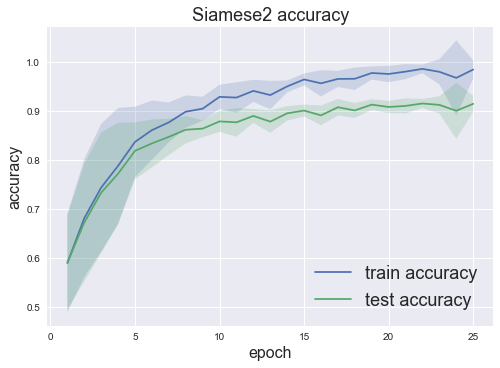

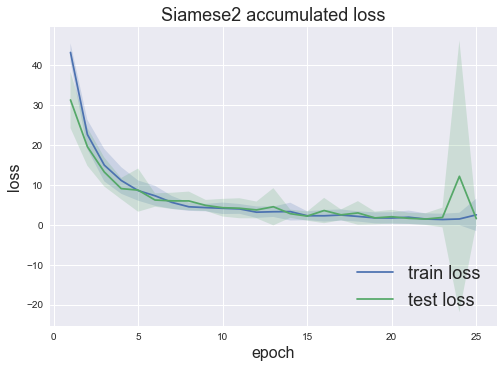

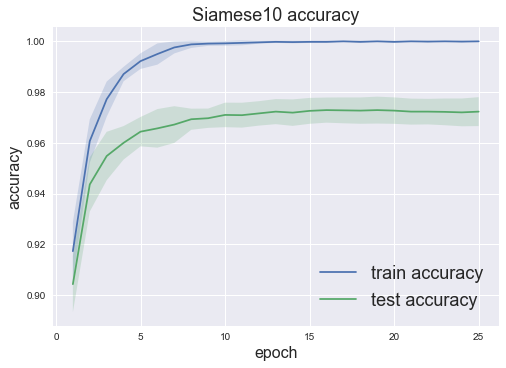

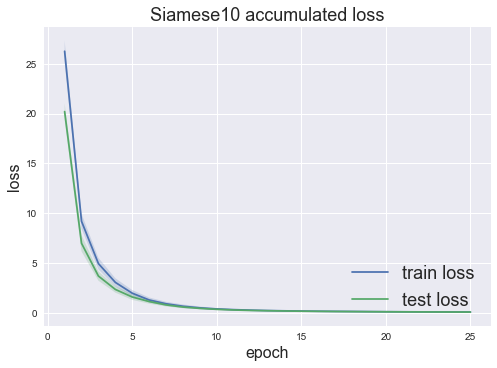

In [29]:
plot2(df_base, "Base model accuracy", mode="accuracy")
plot2(df_base, "Base model accumulated loss", mode="loss")

plot2(df_siam2, "Siamese2 accuracy", mode="accuracy")
plot2(df_siam2, "Siamese2 accumulated loss", mode="loss")

plot2(df_siam10, "Siamese10 accuracy", mode="accuracy")
plot2(df_siam10, "Siamese10 accumulated loss", mode="loss")

In [30]:
def plot_graph(model_data, model_name, column_name, title_fontsize=18, axis_fontsize=16, epochs=21, save=True):
    # Create the avg line to plot
    df_base_avarage = model_data.xs(0, level="run")[column_name][0:epochs]
    
    for run in range(1,10):
        df_base_avarage = df_base_avarage + model_data.xs(run, level="run")[column_name][0:epochs]
    df_base_avarage = df_base_avarage / 10

    for run in range(0,9):
        model_data.xs(run, level="run")[column_name][0:epochs].plot(linestyle=':', linewidth=1)
    df_base_avarage.plot(color="black", linewidth=2, label="mean",legend="average_line")
    
    plt.title(model_name, fontsize=title_fontsize)
    plt.ylabel(column_name, fontsize=axis_fontsize)
    plt.xlabel("epoch", fontsize=axis_fontsize)
    
    if save:
        fname = f"./plots/{model_name}_{column_name}.eps"
        plt.savefig(fname, dpi="figure")

    #plt.style.use("seaborn")

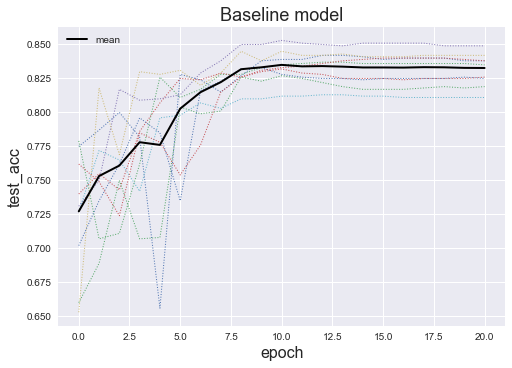

In [100]:
plot_graph(model_data = df_base,
           model_name = "Baseline model",
           column_name = "test_acc")

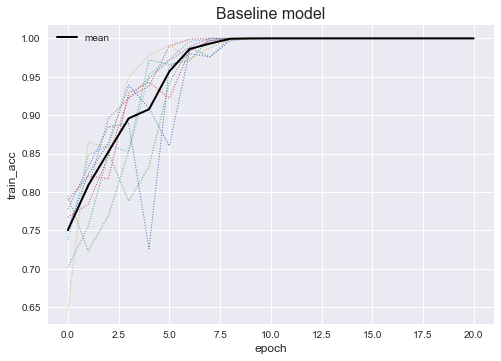

In [101]:
plot_graph(model_data = df_base,
           model_name = "Baseline model",
           column_name = "train_acc")

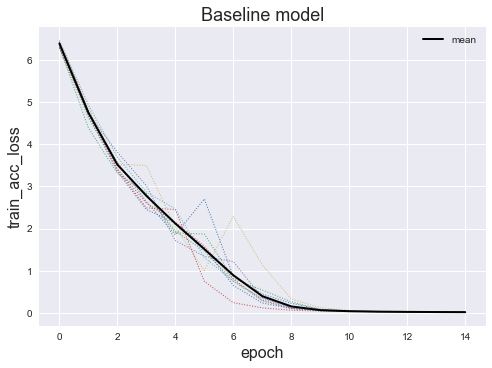

In [95]:
plot_graph(model_data = df_base,
           model_name = "Baseline model",
           column_name = "train_acc_loss")

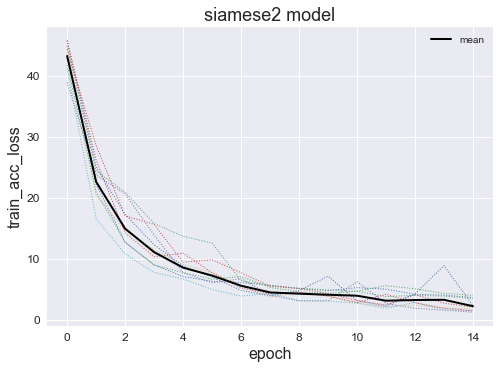

In [52]:
plot_graph(model_data = df_siam2, 
           model_name = "siamese2 model",
           column_name = "train_acc_loss", 
           epochs = 15, 
           title_fontsize = 16, 
           axis_fontsize = 12)

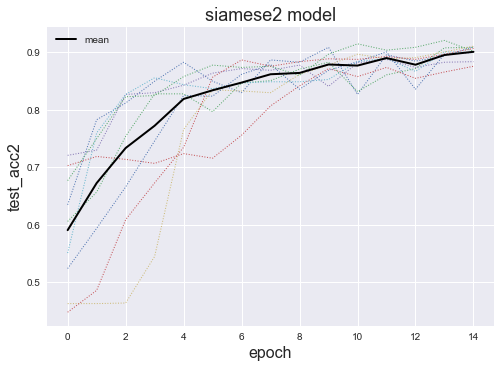

In [55]:
plot_graph(model_data = df_siam2,
           model_name = "siamese2 model",
           column_name = "test_acc2", 
           epochs = 15, 
           title_fontsize = 16, 
           axis_fontsize = 12)

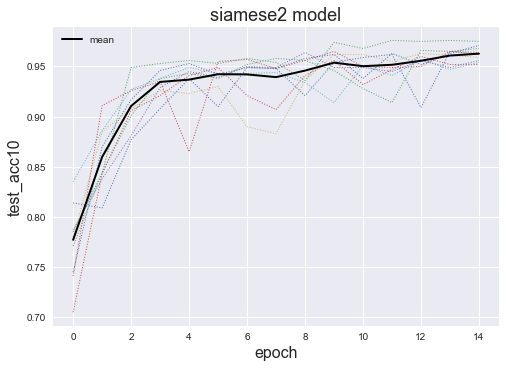

In [56]:
plot_graph(model_data = df_siam2,
           model_name = "siamese2 model",
           column_name = "test_acc10", 
           epochs = 15, 
           title_fontsize = 16, 
           axis_fontsize = 12)